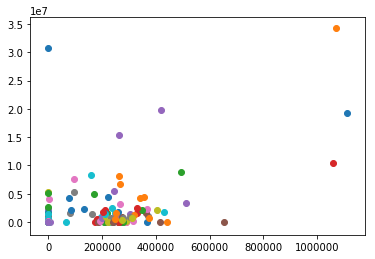

no predictions object named pred_before found, no clusters to plot
[[  3.29165684e-01   0.00000000e+00   1.02532746e-02]
 [  2.40360024e-01   1.94493691e-01   5.44066653e-02]
 [  1.53826564e-01   1.42374791e-01   2.04447106e-03]
 [  0.00000000e+00   1.89776031e-02   0.00000000e+00]
 [  2.18934757e-01   1.61230322e-01   2.78758765e-03]
 [  2.40351925e-01   0.00000000e+00   6.06917011e-03]
 [  0.00000000e+00   1.43671679e-02   1.78469553e-02]
 [  3.33359130e-01   3.21428222e-02   3.95884434e-02]
 [  0.00000000e+00   1.51697646e-01   3.02420458e-02]
 [  1.77358453e-01   2.56282799e-02   1.67789926e-02]
 [  1.17636049e-01   6.64592547e-02   2.99365604e-02]
 [  2.59695768e-01   0.00000000e+00   1.09160222e-02]
 [  2.23661832e-01   2.22809026e-02   1.94557650e-02]
 [  2.31706768e-01   0.00000000e+00   1.49194871e-02]
 [  0.00000000e+00   6.45816409e-02   9.33298505e-03]
 [  0.00000000e+00   1.08361721e-02   0.00000000e+00]
 [  2.59653474e-01   0.00000000e+00   1.43911450e-02]
 [  2.26458662e

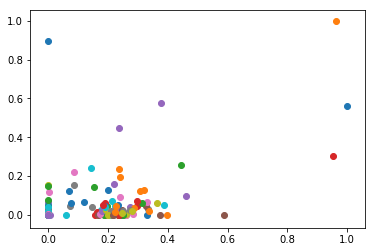

no predictions object named pred_after found, no cluster to plot
Max exercised stock options is  34348384.0 ; Min is  3285.0
Max salary is  1111258.0 ; Min is  477.0


In [7]:
#!/usr/bin/python

"""
Skeleton code for k-means clustering mini-project
"""

import pickle
import numpy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sys
sys.path.append("../tools/")
from feature_format import featureFormat,targetFeatureSplit

def Draw(pred,features,poi,mark_poi=False, name="image.png", f1_name="feaure 1", f2_name="feature 2"):
    """some plotting code designed to help you visualize your clusters """
    
    ### plot each cluster with a different color-add more colors for
    ### drawing more than five clusters
    colors=["b","c","k","m","g"]
    for ii,pp in enumarated(pred):
        plt.scatter(features[ii][0],features[ii][1],color=colors[pred[ii]])
        
        ### if you like,place red stars over points that are POIs (just for funeis)
        if mark_poi:
            for ii,pp in enumarate(pred):
                if poi[ii]:
                    plt.scatter(features[ii][0],features[ii][1],color="r",marker="*")                                          
        plt.xlabel(f1_name)
        plt.ylabel(f2_name)
        plt.savefig(name)
        plt.show()
                                         
                                         
### load in the dict of dicts containing all the data on each person in the dataset
data_dict=pickle.load(open("C:/ATT Training courses/ND Machine Learning/Projects/ud120-projects/final_project/final_project_dataset.pkl","r"))
### there's an outlier---remove it!
data_dict.pop("TOTAL",0)
                                
### the input features we want to use
### can be any key in the person-level dictionary (salary, director_fees,etc.)
feature_1="salary"
feature_2="exercised_stock_options"    
feature_3="total_payments"
poi="poi"
features_list=[poi,feature_1,feature_2,feature_3]
data=featureFormat(data_dict,features_list)
poi,finance_features=targetFeatureSplit(data)
                                         
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to
### for f1,f2,_in finance_features:
### *as it's currently written, the line below assume 2 features)
for f1,f2,_ in finance_features:
    plt.scatter(f1,f2)
plt.show()

### cluster here: create predictions of the clutter labels
### for the data and store them to a list called pred
clf_before=KMeans(n_clusters=2)
pred_before = clf_before.fit_predict(finance_features)
                                         
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred_before,finance_features,poi,mark_poi=False,name="cluster_before_scaling.pdf",f1_name=feature_1,f2_name=feature_2)                                         
except NameError:
    print "no predictions object named pred_before found, no clusters to plot"         
    
    
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_finance_features= scaler.fit_transform(finance_features)
print scaled_finance_features
clf_after=KMeans(n_clusters=2)
pred_after=clf_after.fit_predict(scaled_finance_features)

for f1, f2,_ in scaled_finance_features:
    plt.scatter(f1,f2)
plt.show()

try:
    Draw(pred_after,scaled_finance_features,poi,mark_poi=False,name="cluster_after_scaling.pdf",f1_name=feature_1,f2_name=feature_2)
except NameError:
    print "no predictions object named pred_after found, no cluster to plot"

stock=[]
salary=[]
for i in data_dict:
    if data_dict[i]["exercised_stock_options"] != 'NaN':
        stock.append(float(data_dict[i]["exercised_stock_options"]))
    if data_dict[i][feature_1] != 'NaN':
        salary.append(float(data_dict[i][feature_1]))
        
stock_max=max(stock)
stock_min=min(stock)
salary_max=max(salary)
salary_min=min(salary)

##another way to get max, min
##stock_max=data[:,2].max
##stock_min=(data[:,2][np.nonzero(data[:,2])]).min()

print "Max exercised stock options is ", stock_max, "; Min is ", stock_min
print "Max salary is ", salary_max, "; Min is ", salary_min

